epoch = 0 w and b -  tensor(1., requires_grad=True) tensor(1., requires_grad=True)
the gradients are -  tensor(112.2217) tensor(6.3304)
epoch = 1 w and b -  tensor(0.8878, requires_grad=True) tensor(0.9937, requires_grad=True)
the gradients are -  tensor(42.2868) tensor(2.3978)
epoch = 2 w and b -  tensor(0.8455, requires_grad=True) tensor(0.9913, requires_grad=True)
the gradients are -  tensor(15.9339) tensor(0.9159)
epoch = 3 w and b -  tensor(0.8296, requires_grad=True) tensor(0.9904, requires_grad=True)
the gradients are -  tensor(6.0035) tensor(0.3575)
epoch = 4 w and b -  tensor(0.8236, requires_grad=True) tensor(0.9900, requires_grad=True)
the gradients are -  tensor(2.2616) tensor(0.1471)
epoch = 5 w and b -  tensor(0.8213, requires_grad=True) tensor(0.9899, requires_grad=True)
the gradients are -  tensor(0.8515) tensor(0.0678)
epoch = 6 w and b -  tensor(0.8204, requires_grad=True) tensor(0.9898, requires_grad=True)
the gradients are -  tensor(0.3202) tensor(0.0379)
epoch = 7 

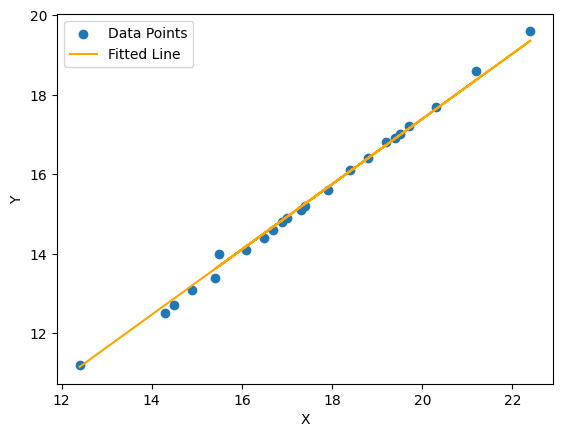

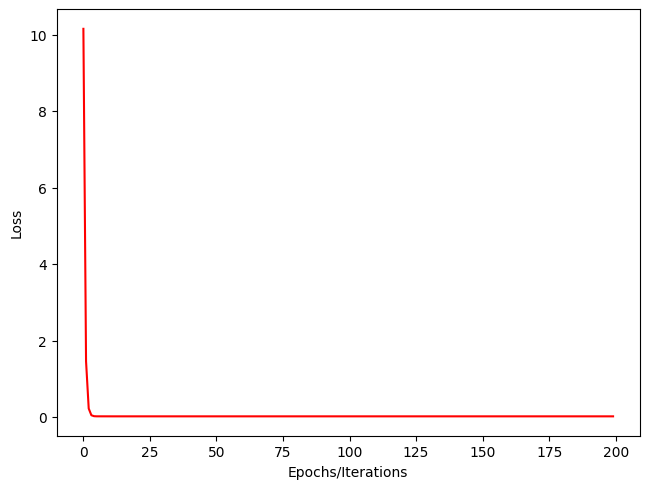

In [18]:
import torch
import matplotlib.pyplot as plt

X = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])

Y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

def forward(x):
    return w * x + b

# Mean Square Error.
def criterion(Y_pred, y):
    return torch.mean((Y_pred - y) ** 2)

lr = 0.001
ll = []
iter = 200

for i in range(iter):
    Y_pred = forward(X)
    loss = criterion(Y_pred, Y) 
    print( "epoch =", i, 'w and b - ', w, b)
    ll.append(loss.item())
    loss.backward()
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data
    print('the gradients are - ',w.grad.data, b.grad.data)
    w.grad.data.zero_()
    b.grad.data.zero_()

Y_pred_final = forward(X)

plt.scatter(X.numpy(), Y.numpy(), label='Data Points')
plt.plot(X.numpy(), Y_pred_final.detach().numpy(), color='orange', label='Fitted Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


plt.plot(ll, 'r')
plt.tight_layout()
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

## Q2

Epoch 1:
  w.grad: -174.0
  b.grad: -52.0
  Updated w: 1.1740000247955322
  Updated b: 1.0520000457763672
----------------------------------------
Epoch 2:
  w.grad: -170.20799255371094
  b.grad: -50.85199737548828
  Updated w: 1.344208002090454
  Updated b: 1.1028521060943604
----------------------------------------


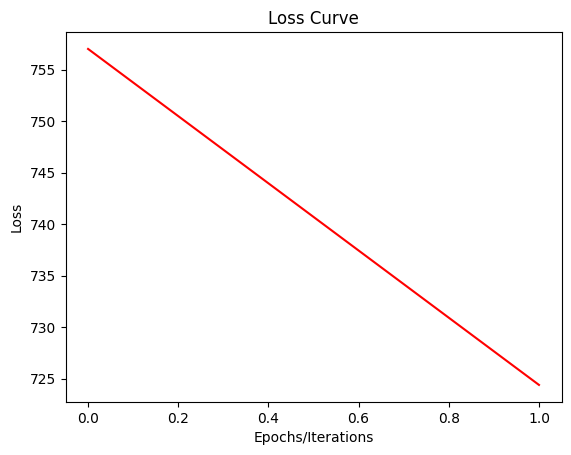

In [9]:
import torch
import matplotlib.pyplot as plt

X = torch.tensor([2,4])

Y = torch.tensor([20,40])

w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

lr = 0.001
epochs = 2
ll = []

for epoch in range(epochs):
    Y_pred = w * X + b

    loss = torch.mean((Y_pred - Y) ** 2)
    ll.append(loss.item())

    loss.backward()

    print(f"Epoch {epoch + 1}:")
    print(f"  w.grad: {w.grad.item()}")
    print(f"  b.grad: {b.grad.item()}")  #

    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

    print(f"  Updated w: {w.item()}")
    print(f"  Updated b: {b.item()}")
    print('-' * 40)

plt.plot(ll, 'r')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()


## Q3

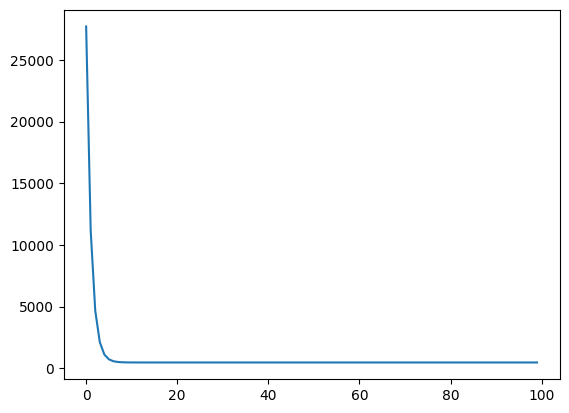

In [10]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
lr = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1], requires_grad=True)
        self.b = torch.rand([1], requires_grad=True)

    def forward(self, x):
        return self.w*x+ self.b

    def update(self):
        self.w -= lr*self.w.grad
        self.b -= lr*self.w.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj,y_p):
    return torch.mean(yj - y_p)**2

model = RegressionModel()

loss_list = []
for epochs in range(100):
    loss = 0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j],y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        model.update()

    model.reset_grad()

plt.plot(loss_list)
plt.show()